In [1]:
from typing import Sequence
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_datasets() -> Sequence[np.ndarray]:
    """
    Reads the datasets needed for the exercise.
    """
    with h5py.File("data/train_catvnoncat.h5") as file:
        x_train: np.ndarray = file["train_set_x"][:]
        y_train: np.ndarray = file["train_set_y"][:]
        classes: np.ndarray = file["list_classes"][:]
    with h5py.File("data/test_catvnoncat.h5") as file:
        x_test: np.ndarray = file["test_set_x"][:]
        y_test: np.ndarray = file["test_set_y"][:]
    return x_train, y_train, x_test, y_test, classes

In [3]:
# Loading the training and test sets
x_train, y_train, x_test, y_test, classes = read_datasets()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [4]:
# Reshaping the x's to be adequate for the classifier
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(209, 12288)
(209, 1)
(50, 12288)
(50, 1)


In [5]:
# Normalizing the features
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# Defining the functions required for logistic regression

def cost(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Logistic cost function.
    """
    losses = y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    return -np.mean(losses)


class LogisticRegression:
    """
    Logistic regression implementation.
    """
    
    def __init__(self, threshold: float = 0.5):
        """
        :param threshold: Value to decide between predicting class 0 or 1. 
        """
        self._threshold: float = threshold
        self._w: np.ndarray = np.zeros(0)
        self._b: float = 0.0

    def fit(
        self,
        x: np.ndarray,
        y: np.ndarray,
        epochs: int = 100,
        learning_rate: float = 0.01,
    ) -> np.ndarray:
        """
        :param epochs: Number of training iterations 
        :param learning_rate: Gradient descent learning rate
        """
        m, n = x.shape[:2]
        self._w = np.zeros((n, 1))
        self._b = 0.0
        
        costs: np.ndarray = np.zeros(epochs, dtype=np.float64)
        for i in range(epochs):
            y_pred: np.ndarray = self.prob(x)
            dj_dy: np.ndarray = y_pred - y
            dj_dw: np.ndarray = np.dot(x.T, dj_dy) / m
            dj_db: np.ndarray = np.sum(dj_dy) / m
            
            self._w -= learning_rate * dj_dw
            self._b -= learning_rate * dj_db
            
            costs[i] = cost(y, y_pred)
        return costs

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Computes target classes for each example in `x`.
        """
        return (self.prob(x) >= self._threshold).astype(int)

    def prob(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of each example in `x` to be of class 1.
        """
        return self._sigmoid(np.dot(x, self._w) + self._b)

    @staticmethod
    def _sigmoid(z: np.ndarray) -> np.ndarray:
        return 1.0 / (1.0 + np.exp(-z))

In [11]:
# Defining and training the classifier
epochs: int = 5000
learning_rate: float = 0.005
classifier: LogisticRegression = LogisticRegression()
costs: np.ndarray = classifier.fit(x_train, y_train, epochs, learning_rate)

In [12]:
# Evaluating against the train set
y_pred: np.ndarray = classifier.predict(x_train)
print(np.mean(y_train == y_pred) * 100, "%")

100.0 %


In [13]:
# Evaluating against the test set
y_pred: np.ndarray = classifier.predict(x_test)
print(np.mean(y_test == y_pred) * 100, "%")

70.0 %


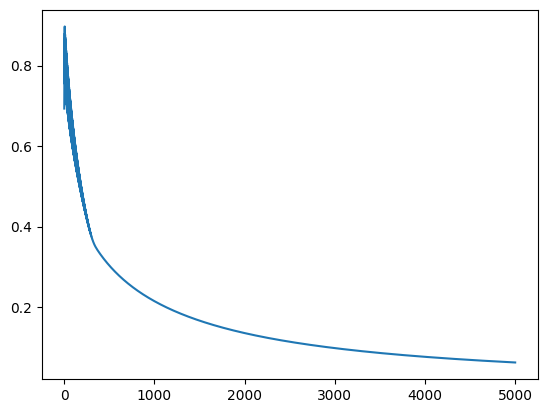

In [14]:
# Displaying the cost per epoch
plt.plot(range(epochs), costs)
plt.show()